<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(_0_8)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-0.8'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.8_n30.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,83.255854,29.121670,22.620078,-0.049554,144.948047,144.997446,-0.049399
1,0.0,1.0,59.090501,29.392400,55.311067,-0.052289,153.741679,153.790589,-0.048910
2,0.0,2.0,45.837521,76.989133,48.343013,0.029706,181.199373,181.187944,0.011429
3,0.0,3.0,74.642521,56.571391,71.357090,0.033382,212.604384,212.579715,0.024669
4,0.0,4.0,43.089810,26.403341,59.959082,0.034341,139.486574,139.446421,0.040153
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,22.660343,52.947708,99.148651,-0.008071,184.748631,184.738477,0.010155
29996,999.0,26.0,85.166266,92.294536,21.542876,-0.040545,208.963134,208.996335,-0.033201
29997,999.0,27.0,21.042920,22.436949,96.001021,-0.057553,149.423338,149.472496,-0.049158
29998,999.0,28.0,42.450656,97.992235,33.852380,-0.005293,184.289977,184.261887,0.028090


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    83.255854  29.121670  22.620078  ...  144.948047  144.997446 -0.049399
      1.0    59.090501  29.392400  55.311067  ...  153.741679  153.790589 -0.048910
      2.0    45.837521  76.989133  48.343013  ...  181.199373  181.187944  0.011429
      3.0    74.642521  56.571391  71.357090  ...  212.604384  212.579715  0.024669
      4.0    43.089810  26.403341  59.959082  ...  139.486574  139.446421  0.040153
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   22.660343  52.947708  99.148651  ...  184.748631  184.738477  0.010155
      26.0   85.166266  92.294536  21.542876  ...  208.963134  208.996335 -0.033201
      27.0   21.042920  22.436949  96.001021  ...  149.423338  149.472496 -0.049158
      28.0   42.450656  97.992235  33.852380  ...  184.289977  184.261887  0.028090
      29.0   81.691115  78.868344  29.851689  ...  200.421760  200.408006  0.013754

[30000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    83.255854  29.121670  22.620078  ...  144.948047  144.997446 -0.049399
      1.0    59.090501  29.392400  55.311067  ...  153.741679  153.790589 -0.048910
      2.0    45.837521  76.989133  48.343013  ...  181.199373  181.187944  0.011429
      3.0    74.642521  56.571391  71.357090  ...  212.604384  212.579715  0.024669
      4.0    43.089810  26.403341  59.959082  ...  139.486574  139.446421  0.040153
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   22.660343  52.947708  99.148651  ...  184.748631  184.738477  0.010155
      26.0   85.166266  92.294536  21.542876  ...  208.963134  208.996335 -0.033201
      27.0   21.042920  22.436949  96.001021  ...  149.423338  149.472496 -0.049158
      28.0   42.450656  97.992235  33.852380  ...  184.289977  184.261887  0.028090
      29.0   81.691115  78.868344  29.851689  ...  200.421760  200.408006  0.013754

[30000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,83.255854,29.121670,22.620078,-0.049554,144.948047,144.997446,-0.049399
1,0.0,1.0,59.090501,29.392400,55.311067,-0.052289,153.741679,153.790589,-0.048910
2,0.0,2.0,45.837521,76.989133,48.343013,0.029706,181.199373,181.187944,0.011429
3,0.0,3.0,74.642521,56.571391,71.357090,0.033382,212.604384,212.579715,0.024669
4,0.0,4.0,43.089810,26.403341,59.959082,0.034341,139.486574,139.446421,0.040153
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,22.660343,52.947708,99.148651,-0.008071,184.748631,184.738477,0.010155
29996,999.0,26.0,85.166266,92.294536,21.542876,-0.040545,208.963134,208.996335,-0.033201
29997,999.0,27.0,21.042920,22.436949,96.001021,-0.057553,149.423338,149.472496,-0.049158
29998,999.0,28.0,42.450656,97.992235,33.852380,-0.005293,184.289977,184.261887,0.028090


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    83.255854  29.121670  22.620078  ...  144.948047  144.997446 -0.049399
      1.0    59.090501  29.392400  55.311067  ...  153.741679  153.790589 -0.048910
      2.0    45.837521  76.989133  48.343013  ...  181.199373  181.187944  0.011429
      3.0    74.642521  56.571391  71.357090  ...  212.604384  212.579715  0.024669
      4.0    43.089810  26.403341  59.959082  ...  139.486574  139.446421  0.040153
...                ...        ...        ...  ...         ...         ...       ...
999.0 25.0   22.660343  52.947708  99.148651  ...  184.748631  184.738477  0.010155
      26.0   85.166266  92.294536  21.542876  ...  208.963134  208.996335 -0.033201
      27.0   21.042920  22.436949  96.001021  ...  149.423338  149.472496 -0.049158
      28.0   42.450656  97.992235  33.852380  ...  184.289977  184.261887  0.028090
      29.0   81.691115  78.868344  29.851689  ...  200.421760  200.408006  0.013754

[30000 rows x 7 columns]

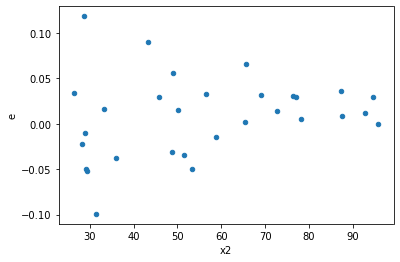

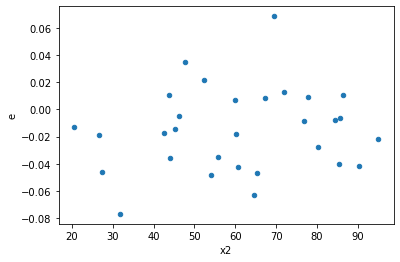

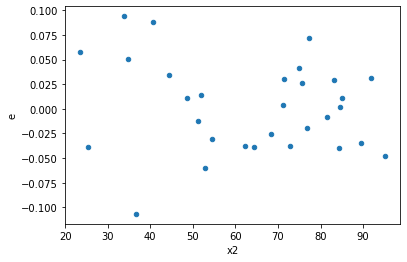

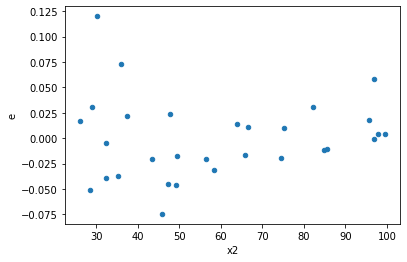

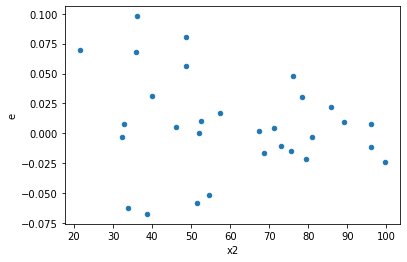

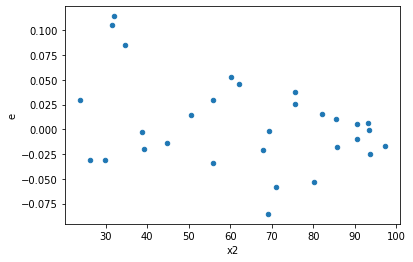

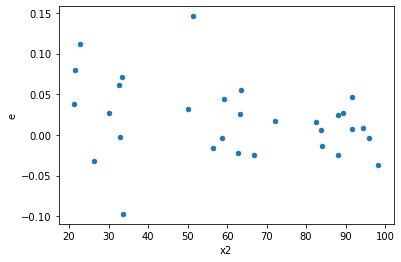

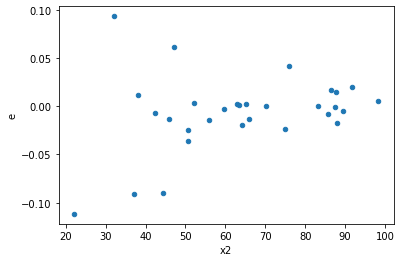

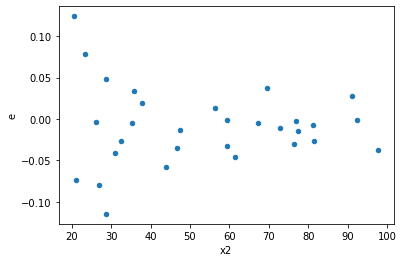

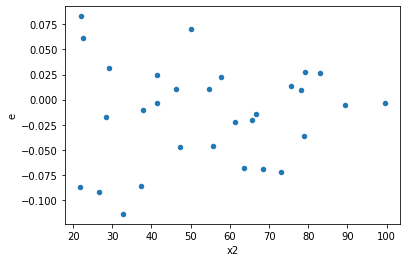

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]
    k_means = KMeans(n_clusters=2)
    model = k_means.fit(x)
    model

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = k_means.predict(x)
    y_kmeans

    # kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    data_sort_clusters = data_clusters.sort_values('clusters')
    data_sort_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster1 = data_sort_clusters[data_sort_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSR1 = model1.ssr
    MSE1 = model1.mse_resid

    # กลุ่มที่ 2
    data_cluster0 = data_sort_clusters[data_sort_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model0 = sm.OLS(y, x).fit()

    DF0 = model0.df_resid + 1
    SSR0 = model0.ssr
    MSE0 = model0.mse_resid

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSR1/DF1) / (SSR0/DF0)

    df1 = DF1
    df0 = DF0

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df0)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df0)
    
    return df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df0=[]
list_df1=[]
list_SSR0=[]
list_SSR1=[]
list_MSE0=[]
list_MSE1=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df0, df1, SSR0, SSR1, MSE0, MSE1, GQ_test_clusters, two_tailed, p_greater=get_result(run_replicate)

    list_df0.append(df0)
    list_df1.append(df1)
    list_SSR0.append(SSR0)
    list_SSR1.append(SSR1)
    list_MSE0.append(MSE0)
    list_MSE1.append(MSE1)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,12.0,12.0,0.0086597630192243,0.043681114637173106,0.0007872511835658455,0.003971010421561192,5.044146651611934,0.008873848264628892,0.9955630758676856,Reject001=0 : Heteroscedasticity
4.0,18.0,6.0,0.019049276310354676,0.014992724987322643,0.001120545665314981,0.0029985449974645286,2.3611487507018314,0.14732565147956955,0.9263371742602152,Reject001=1 : Homoscedasticity
5.0,7.0,17.0,0.004451185584276455,0.04183852837711795,0.0007418642640460759,0.0026149080235698717,3.8703462269939974,0.07591376464863875,0.9620431176756806,Reject001=1 : Homoscedasticity
8.0,11.0,13.0,0.0071332817360513145,0.03807295279496318,0.0007133281736051314,0.0031727460662469317,4.516234831869281,0.01714428324263295,0.9914278583786835,Reject001=1 : Homoscedasticity
9.0,12.0,12.0,0.02384323965089224,0.03381593506340001,0.002167567240990204,0.0030741759148545465,1.4182609225309104,0.554317192212948,0.722841403893526,Reject001=1 : Homoscedasticity
11.0,14.0,10.0,0.009329197955479972,0.01382797138486456,0.0007176306119599979,0.001536441264984951,2.0751151418583427,0.20581397062750706,0.8970930146862465,Reject001=1 : Homoscedasticity
12.0,13.0,11.0,0.008263622925641718,0.01614047572644459,0.0006886352438034765,0.001614047572644459,2.3083226144694824,0.1536857729764467,0.9231571135117767,Reject001=1 : Homoscedasticity
13.0,10.0,14.0,0.013672068110060406,0.030694184600493685,0.0015191186788956006,0.002361091123114899,1.6035918922645227,0.4572358736744022,0.7713820631627989,Reject001=1 : Homoscedasticity
14.0,14.0,10.0,0.018861205551295633,0.02097595822792654,0.0014508619654842795,0.0023306620253251715,1.556970546725201,0.43573439457265173,0.7821328027136741,Reject001=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df0":list_df0, "df1":list_df1, "SSR0":list_SSR0,
                     "SSR1":list_SSR1, "MSE0":list_MSE0, "MSE1":list_MSE1,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df0,df1,SSR0,SSR1,MSE0,MSE1,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,12.0,12.0,0.0086597630192243,0.043681114637173106,0.0007872511835658455,0.003971010421561192,5.044146651611934,0.008873848264628892,Reject001=0 : Heteroscedasticity
1.0,12.0,12.0,0.01433829161566402,0.00886485351783418,0.0013034810559694563,0.0008058957743485619,0.6182642783014454,0.4168539618988686,Reject001=1 : Homoscedasticity
2.0,13.0,11.0,0.03877991274582822,0.01283202823811288,0.003231659395485685,0.001283202823811288,0.39105617335452963,0.12729279386760484,Reject001=1 : Homoscedasticity
3.0,18.0,6.0,0.03838334540353429,0.0036529828810722507,0.0022578438472667228,0.0007305965762144501,0.2855131184632923,0.12749032180765651,Reject001=1 : Homoscedasticity
4.0,18.0,6.0,0.019049276310354676,0.014992724987322643,0.001120545665314981,0.0029985449974645286,2.3611487507018314,0.14732565147956955,Reject001=1 : Homoscedasticity
5.0,7.0,17.0,0.004451185584276455,0.04183852837711795,0.0007418642640460759,0.0026149080235698717,3.8703462269939974,0.07591376464863875,Reject001=1 : Homoscedasticity
6.0,13.0,11.0,0.03810941235701758,0.01747782808093215,0.003175784363084798,0.001747782808093215,0.5420082265040336,0.3158928901640484,Reject001=1 : Homoscedasticity
7.0,17.0,7.0,0.027875453658501102,0.009412097535267729,0.001742215853656319,0.0015686829225446215,0.8200028396706592,0.832194269216801,Reject001=1 : Homoscedasticity
8.0,11.0,13.0,0.0071332817360513145,0.03807295279496318,0.0007133281736051314,0.0031727460662469317,4.516234831869281,0.01714428324263295,Reject001=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      860
Reject001=0 : Heteroscedasticity    140
Name: Result_test, dtype: int64